In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

## Supp Fig. 2a - Number of variants tagging non-blood traits

In [9]:
matched_snps = pd.read_table('../data/SuppFig2/SNPsnap_PU1_100kb_matched_snps.txt')

In [21]:
test_snps = []
for snp in matched_snps['Input_SNP']:
    test_snps.append(tuple(snp.split(':')))

filename = '../data/SuppFig2/t2d.leadsnps.ld'
test_tagged = set()
gwas_snps = []
with open(filename, 'r') as tagging_f:
    tagging_reader = tagging_f.readlines()
    tagging_reader = tagging_reader[1:]
    for row in tagging_reader:
        row = row.strip().split()
        snp_one = (row[0], row[1])
        snp_two = (row[3], row[4])
        ld = float(row[6])
        gwas_snps.append(snp_one)
        if snp_two in test_snps:
            test_tagged.add(snp_one)
gwas_snps = set(gwas_snps)

print("Number of PU.1 bQTLs tagging T2D GWAS variants:",len(test_tagged))
print("Total number of T2D GWAS variants:", len(gwas_snps))

Number of PU.1 bQTLs tagging T2D GWAS variants: 2
Total number of T2D GWAS variants: 378


In [ ]:
null_set = {}
t2d_null_tagged = []


for i in range(250):
    col = 'Set_' + str(i+1)
    test_snps = []
    for snp in matched_snps[col]:
        test_snps.append(tuple(snp.split(':')))

    filename = '../data/SuppFig2/t2d.leadsnps.ld'
    test_tagged = set()
    gwas_snps = []
    with open(filename, 'r') as tagging_f:
        tagging_reader = tagging_f.readlines()
        tagging_reader = tagging_reader[1:]
        for row in tagging_reader:
            row = row.strip().split()
            snp_one = (row[0], row[1])
            snp_two = (row[3], row[4])
            ld = float(row[6])
            gwas_snps.append(snp_one)
            if snp_two in test_snps:
                test_tagged.add(snp_one)
    t2d_null_tagged.append(test_tagged)
    gwas_snps = set(gwas_snps)
    
    #print(len(test_tagged), len(gwas_snps))

In [22]:
t2d_num_tag = []
for i in range(250):
    t2d_num_tag.append(len(t2d_null_tagged[i]))

### Now height

In [26]:
test_snps = []
for snp in matched_snps['Input_SNP']:
    test_snps.append(tuple(snp.split(':')))

filename = '../data/SuppFig2/height.leadsnps.ld'
test_tagged = set()
gwas_snps = []
with open(filename, 'r') as tagging_f:
    tagging_reader = tagging_f.readlines()
    tagging_reader = tagging_reader[1:]
    for row in tagging_reader:
        row = row.strip().split()
        snp_one = (row[0], row[1])
        snp_two = (row[3], row[4])
        ld = float(row[6])
        gwas_snps.append(snp_one)
        if snp_two in test_snps:
            test_tagged.add(snp_one)
gwas_snps = set(gwas_snps)


print("Number of PU.1 bQTLs tagging height GWAS variants:",len(test_tagged))
print("Total number of height GWAS variants:", len(gwas_snps))

Number of PU.1 bQTLs tagging height GWAS variants: 5
Total number of height GWAS variants: 691


In [29]:
height_null_set = {}
height_null_tagged = []

for i in range(250):
    col = 'Set_' + str(i+1)
    test_snps = []
    for snp in matched_snps[col]:
        test_snps.append(tuple(snp.split(':')))

    filename = '../data/SuppFig2/height.leadsnps.ld'
    test_tagged = set()
    gwas_snps = []
    with open(filename, 'r') as tagging_f:
        tagging_reader = tagging_f.readlines()
        tagging_reader = tagging_reader[1:]
        for row in tagging_reader:
            row = row.strip().split()
            snp_one = (row[0], row[1])
            snp_two = (row[3], row[4])
            ld = float(row[6])
            gwas_snps.append(snp_one)
            if snp_two in test_snps:
                test_tagged.add(snp_one)
    height_null_tagged.append(test_tagged)
    gwas_snps = set(gwas_snps)

In [30]:
height_num_tag = []
for i in range(250):
    height_num_tag.append(len(height_null_tagged[i]))

/Users/raehoon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


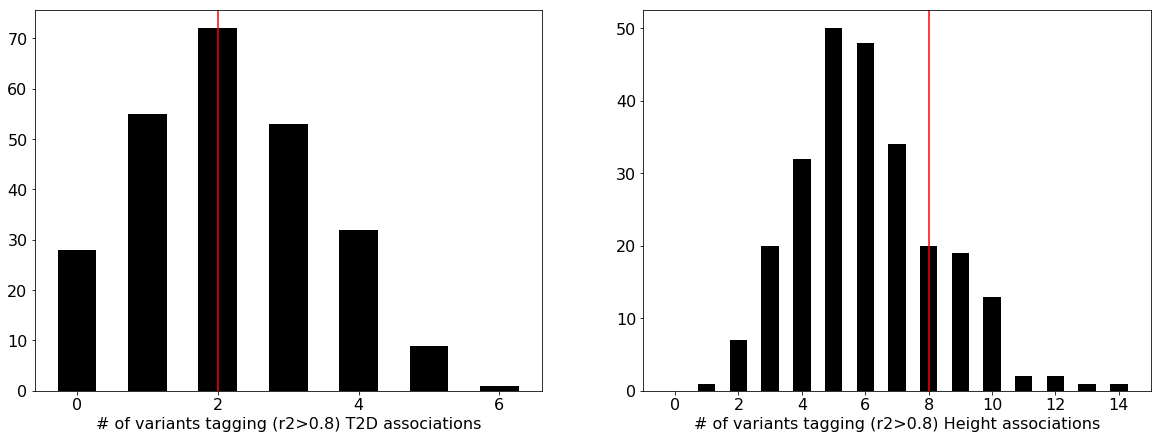

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))

ax[0].hist(t2d_num_tag, bins=np.array(range(8)) - 0.5, rwidth=0.55, color='black')
ax[0].axvline(x = 2, color = 'r')
ax[0].set_xticks(range(0,7,2))
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[0].set_xlabel('# of variants tagging (r2>0.8) T2D associations', fontsize = 16)

ax[1].hist(height_num_tag, bins=np.array(range(16)) - 0.5, rwidth=0.55, color='black')
ax[1].axvline(x = 8, color = 'r')
ax[1].set_xticks(range(0,15,2))
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].set_xlabel('# of variants tagging (r2>0.8) Height associations', fontsize = 16)

fig.savefig('../figures/Supp2_a.pdf')
fig.show()

## Supp Fig. 2b - Reading PU.1 PWM motif data

In [3]:
PU1_pwm = pd.read_table('../data/SuppFig2/PU1.peaks.pwmscan.cisbp_1e5.bed', delimiter='\t', header=None)

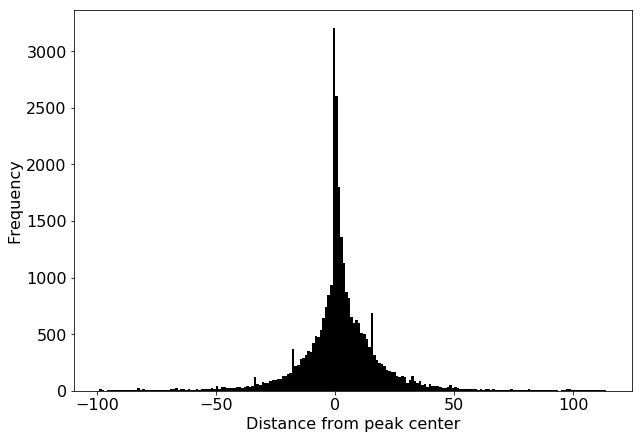

In [68]:
motif_pos = []
for i in range(PU1_pwm.shape[0]):
    if PU1_pwm[9][i] == '+':
        motif_pos.append(PU1_pwm[6][i] - PU1_pwm[1][i] - 100)
    elif PU1_pwm[9][i] == '-':
        motif_pos.append(PU1_pwm[2][i] - PU1_pwm[5][i] - 100)
    
    
plt.figure(figsize = (10, 7)) 

# We can set the number of bins with the `bins` kwarg
motif_pos_counts = plt.hist(motif_pos, bins= 200, color = 'black')#, bins=np.array(range(0,200)))#, rwidth=0.55, color='black')
#axs[1].hist(blood_total, bins=100)


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Distance from peak center', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)

plt.savefig('../figures/Supp2_b.pdf')
plt.show()
